In [8]:
import numpy as np
from gekko import GEKKO

import matplotlib.pyplot as plt
%matplotlib inline

## Solving with GEKKO

We will use GEKKO to solve the differential equation
\begin{equation}
k\frac{dy}{dt} = -ty
\end{equation}
where $k = 10$ and $y(t=0) = 5$.

This equation is a separable differential equation and the analytic solution satisfying the given initial condition is $y(t) = 5\exp(-t^2/2k)$

In [2]:
tm = np.linspace(0,20,100)

m = GEKKO() # Create gekko model
m.time = tm # Set up the time points for the solution
k = 10
y = m.Var(value=5.0) # Create a gekko variable with initial value of 5.0
t = m.Param(value=tm) # Create a gekko parameter with value tm

m.Equation(k*y.dt() == -t*y) # Specify the differential equation for the model.
m.options.IMODE = 4 # Dynamic simulation
m.solve(disp=False) # Solve the DEq but don't display the solution

In [12]:
ya = 5.0 * np.exp(-tm**2/(2*k)) # ya is the analytic solution

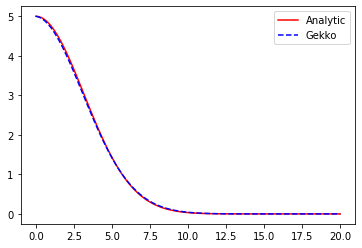

In [19]:
plt.plot(tm, ya, 'r-', label='Analytic') # Plot the analytic solution
plt.plot(m.time, y.value, 'b--', label='Gekko')
plt.legend()

## Solving with odeint

We will use odeint to solve the differential equation
\begin{equation}
k\frac{dy}{dt} = -ty
\end{equation}
where $k = 10$ and $y(t=0) = 5$.

This equation is a separable differential equation and the analytic solution satisfying the given initial condition is $y(t) = 5\exp(-t^2/2k)$

In [14]:
# load the odeint package from scipy.integrate
from scipy.integrate import odeint

In [15]:
def model(y, t): # Define the model for odeint
    k = 10
    dydt = -t*y / k
    return dydt

tm = np.linspace(0, 20, 100) # Define the time points at which to solve the DEq

In [16]:
y_odeint = odeint(model, 5, tm)

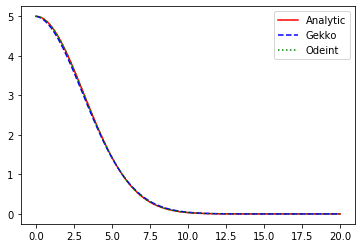

In [18]:
plt.plot(tm, ya, 'r-', label='Analytic') # Plot the analytic solution
plt.plot(m.time, y.value, 'b--', label='Gekko') # Plot the Gekko solution
plt.plot(tm, y_odeint, 'g:', label='Odeint') # Plot the odeint solution
plt.legend()